In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR


In [4]:
taxi=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

In [5]:
taxi.shape

(50000, 8)

In [6]:
taxi.sample(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
6537,27:00.0,11.0,2013-02-01 19:27:00 UTC,-73.984437,40.766622,-73.980840,40.735457,5
36174,31:41.0,13.0,2012-09-14 21:31:41 UTC,-73.991048,40.699666,-73.962703,40.680860,1
41613,46:22.0,8.0,2012-09-19 21:46:22 UTC,-73.988046,40.722337,-73.997575,40.736275,1
37307,49:00.0,15.7,2011-08-26 20:49:00 UTC,-74.000137,40.678348,-73.957513,40.722253,5
40765,21:00.0,3.7,2009-01-22 09:21:00 UTC,-73.991607,40.750080,-73.995038,40.743827,2
577,31:14.0,6.5,2014-06-02 08:31:14 UTC,-73.966418,40.770348,-73.955528,40.765830,1
15718,56:55.0,8.1,2010-05-08 18:56:55 UTC,-74.001372,40.726266,-74.011264,40.707852,3
37339,37:00.0,21.0,2013-07-05 08:37:00 UTC,-73.994090,40.741382,-74.016095,40.704897,3
18003,02:00.0,16.1,2009-12-24 12:02:00 UTC,0.000000,0.000000,0.000000,0.000000,5
14147,53:40.0,16.6,2009-02-07 21:53:40 UTC,-73.978608,40.762113,-73.978307,40.762792,1


In [7]:
taxi.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [8]:
taxi.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [9]:
taxi.describe(include="all")

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,3597,NaN,49555,NaN,NaN,NaN,NaN,NaN
top,26:00.0,NaN,2012-06-28 20:54:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,457,NaN,3,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.364171,NaN,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,NaN,9.685557,NaN,10.393860,6.224857,10.407570,6.014737,1.289195
min,NaN,-5.000000,NaN,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,NaN,6.000000,NaN,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,NaN,8.500000,NaN,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,NaN,12.500000,NaN,-73.967148,40.767360,-73.963584,40.768167,2.000000


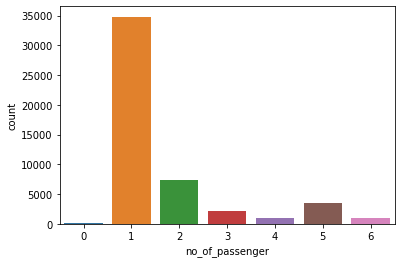

In [10]:
sns.countplot(x="no_of_passenger",data=taxi)

In [11]:
### From here we can see most of the passengers are travelling solo

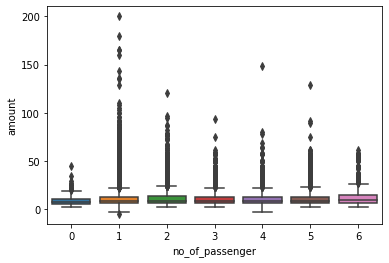

In [12]:
sns.boxplot(x="no_of_passenger",y="amount",data=taxi)

C:\Users\amitj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\amitj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\amitj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

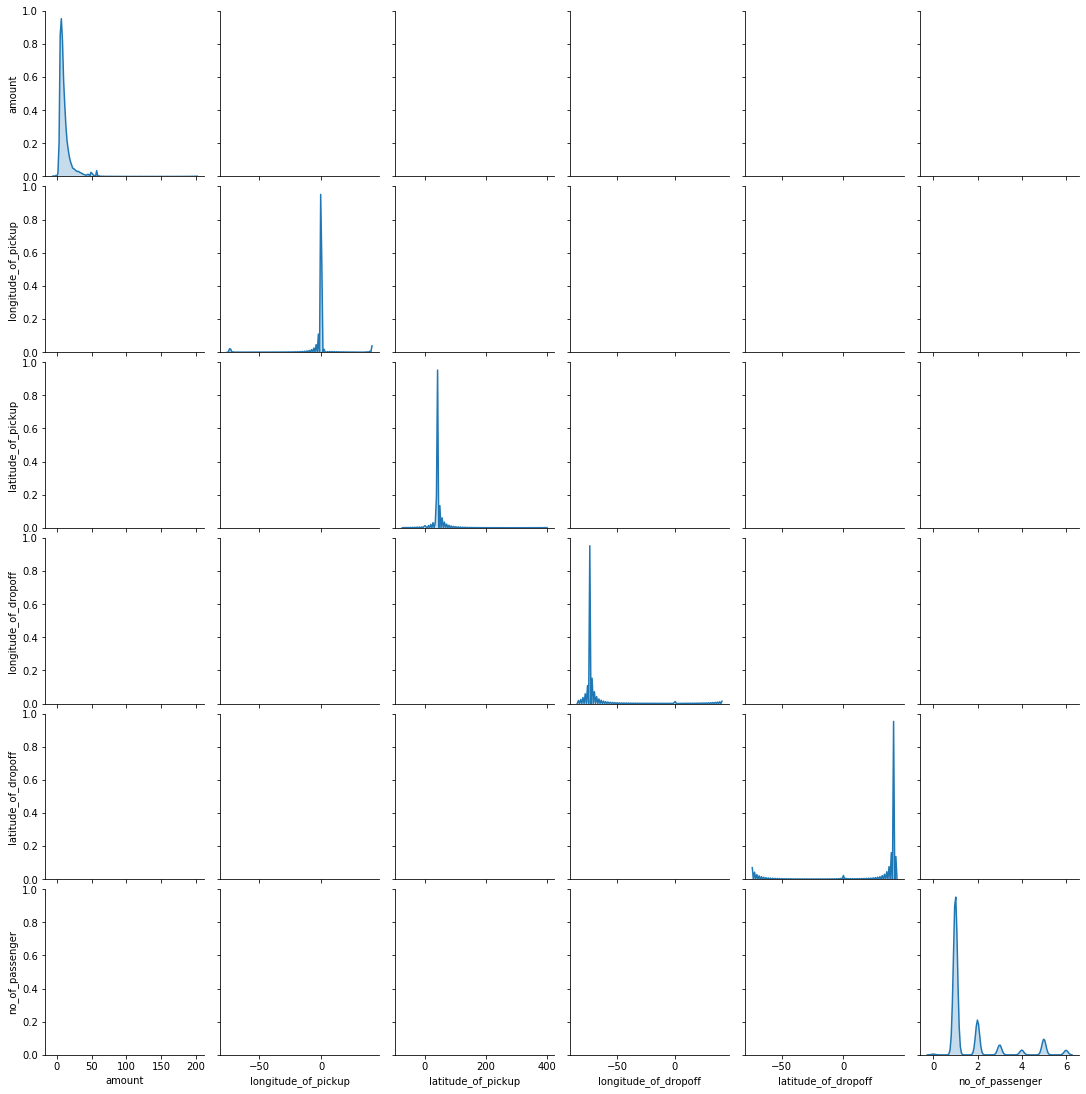

In [13]:
sns.pairplot(taxi,diag_kind="kde")

In [17]:
taxi.drop("date_time_of_pickup",axis=1,inplace=True)
taxi.drop("unique_id",axis=1,inplace=True)


In [18]:
X=taxi.drop(["amount"],axis=1)
y=taxi[["amount"]]

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [29]:
model_1=LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
model_1.score(X_train,y_train)

0.0006109610599230875

In [32]:
y_pred = model_1.predict(X_test)

In [39]:
y_test1=np.array(y_test)
y_pred1=np.array(y_pred)
df = pd.DataFrame({'Actual': y_test1.flatten(), 'Predicted': y_pred1.flatten()})
df


,Actual,Predicted
0,9.0,11.270382
1,6.5,11.760598
2,9.5,11.270644
3,7.5,11.271738
4,9.0,11.433704
...,...,...
14995,7.7,11.273488
14996,8.9,11.275006
14997,8.1,11.270978
14998,7.0,11.270713


In [40]:
### By using Linear Regression we are getting a very inaccurate result


In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X1 = sc_X.fit_transform(X_train)
y1 = sc_y.fit_transform(y_train)
model_2=SVR(kernel="rbf")
model_2.fit(X1,y1)

C:\Users\amitj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [84]:
model_2.score(X1,y1)

-0.066349408448237

In [53]:
y_pred = model_2.predict(X_test)
y_test2=np.array(y_test)
y_pred2=np.array(y_pred)
df = pd.DataFrame({'Actual': y_test2.flatten(), 'Predicted': y_pred2.flatten()})
df

,Actual,Predicted
0,0.890050,-0.306120
1,0.270210,-0.368632
2,4.768181,-0.295326
3,-0.349630,-0.350893
4,0.476823,-0.368431
...,...,...
7345,-0.463267,-0.388857
7346,-0.711203,-0.367813
7347,-0.669881,-0.364445
7348,-0.762857,-0.368877


In [54]:
###


In [55]:
from sklearn.tree import DecisionTreeRegressor 

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
model_3 = DecisionTreeRegressor(random_state = 0) 
model_3.fit(X_train,y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [57]:
model_3.score(X_train,y_train)

0.9750633349294414

In [86]:
y_pred = model_3.predict(X_test)
y_test3=np.array(y_test)
y_pred3=np.array(y_pred)
df = pd.DataFrame({'Actual': y_test3.flatten(), 'Predicted': y_pred3.flatten()})
df

,Actual,Predicted
0,0.890050,0.580130
1,0.270210,0.063596
2,4.768181,4.040902
3,-0.349630,-0.607897
4,0.476823,-0.174009
...,...,...
7345,-0.463267,-0.556243
7346,-0.711203,-0.535582
7347,-0.669881,-0.587235
7348,-0.762857,-0.866163


In [60]:
### From here we can see Decision Tree Regression gives us a more accurate output

In [61]:
from sklearn.ensemble import BaggingRegressor
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [63]:
model_4=BaggingRegressor()
model_4.fit(X_train,y_train)

C:\Users\amitj\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [64]:
model_4.score(X_train,y_train)

0.9358052088029749

In [65]:
y_pred = model_4.predict(X_test)
y_test4=np.array(y_test)
y_pred4=np.array(y_pred)
df = pd.DataFrame({'Actual': y_test4.flatten(), 'Predicted': y_pred4.flatten()})
df

,Actual,Predicted
0,0.890050,0.408641
1,0.270210,0.014009
2,4.768181,4.294210
3,-0.349630,-0.603764
4,0.476823,0.383847
...,...,...
7345,-0.463267,-0.661616
7346,-0.711203,-0.602731
7347,-0.669881,-0.573806
7348,-0.762857,-0.646120


In [66]:
### From here we see Bagging Regression does not give as accurate of a result as Decision Tree

In [67]:
from sklearn.ensemble import AdaBoostRegressor
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [68]:
model_5=AdaBoostRegressor()
model_5.fit(X_train,y_train)

C:\Users\amitj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [69]:
model_5.score(X_train,y_train)

0.1451440246826322

In [70]:
### From the score we see that AdaBoost Regression gives result with bad accuracy

In [71]:
from sklearn.ensemble import GradientBoostingRegressor
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [72]:
model_6=GradientBoostingRegressor()
model_6.fit(X_train,y_train)

C:\Users\amitj\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [73]:
model_6.score(X_train,y_train)

0.7693442091529176

In [74]:
y_pred = model_6.predict(X_test)
y_test6=np.array(y_test)
y_pred6=np.array(y_pred)
df = pd.DataFrame({'Actual': y_test6.flatten(), 'Predicted': y_pred6.flatten()})
df

,Actual,Predicted
0,0.890050,0.226446
1,0.270210,-0.202614
2,4.768181,4.386285
3,-0.349630,-0.349103
4,0.476823,0.125419
...,...,...
7345,-0.463267,-0.348653
7346,-0.711203,-0.381019
7347,-0.669881,-0.354800
7348,-0.762857,-0.376662


In [75]:
### From here we see GradientBoostingRegression gives more accurate result than AdaBoost 

In [76]:
from sklearn.ensemble import RandomForestRegressor
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [78]:
model_7=RandomForestRegressor()
model_7.fit(X_train,y_train)

C:\Users\amitj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [79]:
model_7.score(X_train,y_train)

0.9445238594505704

In [80]:
y_pred = model_7.predict(X_test)
y_test7=np.array(y_test)
y_pred7=np.array(y_pred)
df = pd.DataFrame({'Actual': y_test7.flatten(), 'Predicted': y_pred7.flatten()})
df

,Actual,Predicted
0,0.890050,0.506472
1,0.270210,-0.010061
2,4.768181,4.384986
3,-0.349630,-0.432895
4,0.476823,0.212668
...,...,...
7345,-0.463267,-0.689819
7346,-0.711203,-0.587855
7347,-0.669881,-0.505003
7348,-0.762857,-0.602008


In [81]:
### From here we see that RandomForestRegression gives high accuracy
### From all regression models we see that Decision Tree Regression gives the highest accuracy (0.9750633349294414) with 
### RandomForestRegression being second highest (0.9445238594505704) and Bagging Regression third highest (0.9358052088029749)